# Adaline Study

In [20]:
current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', 'src')

sys.path.append(src_dir)

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adaline.adalineGD import AdalineGD
from adaline.adalineSGD import AdalineSGD
from matplotlib.colors import ListedColormap

### Load Iris dataset

In [10]:
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

print('URL: ', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plot & load the setosa and versicolor classes

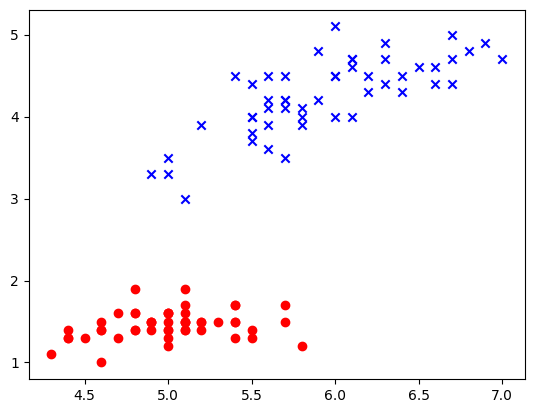

In [12]:
# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

### Learning Rate Study (0.01 & 0.0001)

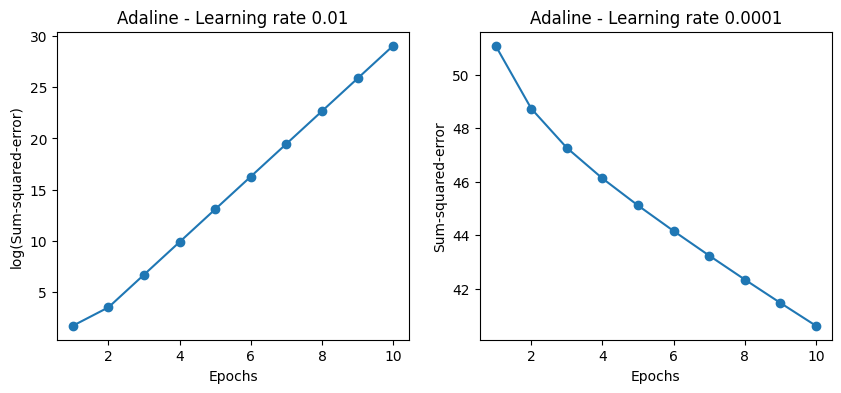

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

This is a good example of how the learning rate can affect the convergence of the model. A learning rate too large causes a swing in the learning process, causing it to diverge. A learning rate too small causes the model to take too long to converge.

### Feature Scaling with Standardization

In [15]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [16]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl,
                    edgecolors='black')

/var/folders/fv/dqslr9qn1w79gjpdq1c2rgxw0000gn/T/ipykernel_61956/572567057.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


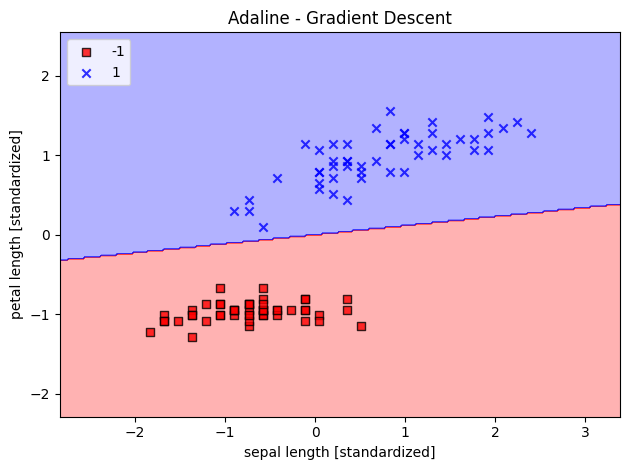

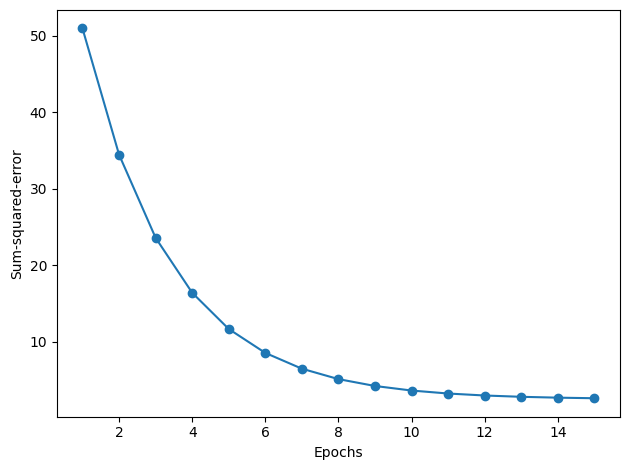

In [17]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

As we can see here, even with the higher learning rate similar to last time (0.01), with feature scaling the model converges much faster and smoothly. But even with a smoother convergence we can see that the SSE is still higher than 0 even though all the flower examples were classified correctly, why is that?

Possiblities:
- The raw linear activiation (even if classified correctly) is not the same as the target value which is -1 or 1.
- The linear activation function tries to fit the model within a linear boundary, but the target values are not linearly separable.
- It is possible that the model converges to a local minimum and not the global minimum.

### Adaline Training with Stochastic Gradient Descent

/var/folders/fv/dqslr9qn1w79gjpdq1c2rgxw0000gn/T/ipykernel_61956/572567057.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


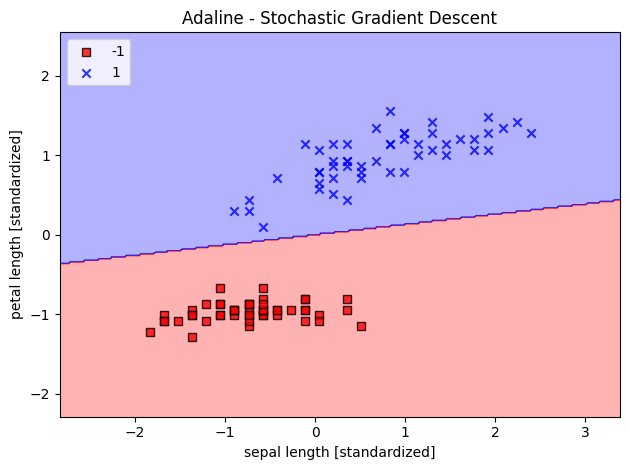

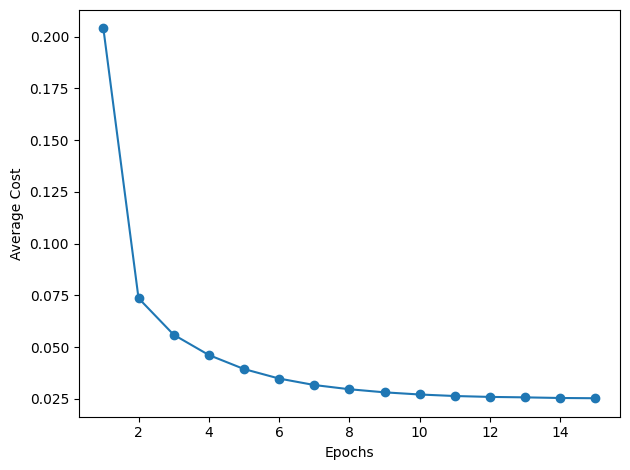

In [21]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

Adaline SGD is a variation of the Adaline algorithm that updates the weights incrementally for each training example. This is a good way to update the weights in a more efficient way, especially when dealing with large datasets. The incremental updates can help the model converge faster and more efficiently, due to the noise from singular datasets allowing the model to escape local minima. SGD also allows for online learning, which is useful for real-time applications in which training data is continuously fed into the model. During online learning, partail fit is used to avoid re-initializing the weights before training.

# Learnings
Adaline is a good intro to binary classifcation using linear activation functions. I already knew a bit about learning rates and standardization and how that affects how the model converges. But it's always nice to have a refresher. Stochastic Gradient Descent gave me a deeper understanding about convergence since it provides a clear example about how adding a little noise can help a model reach deeper convergence.